In [31]:
from ply.utils.image import Image
import cv2
import matplotlib.pyplot as plt
import numpy as np

path_T2w = '/home/GRAMES.POLYMTL.CA/p118739/data_nvme_p118739/data/datasets/data-multi-subject/derivatives/regNcrop_NoSC/sub-amu01/anat/sub-amu01_T2w_reg_crop.nii.gz'
path_T1w = '/home/GRAMES.POLYMTL.CA/p118739/data_nvme_p118739/data/datasets/data-multi-subject/derivatives/regNcrop_NoSC/sub-amu01/anat/sub-amu01_T1w_reg_crop.nii.gz'

img_T2w = Image(path_T2w)
img_T1w = Image(path_T1w)

print(img_T2w.dim)

(51, 245, 251, 1, 1.0, 1.0, 1.0, 1)


Text(0.5, 1.0, 'T2w')

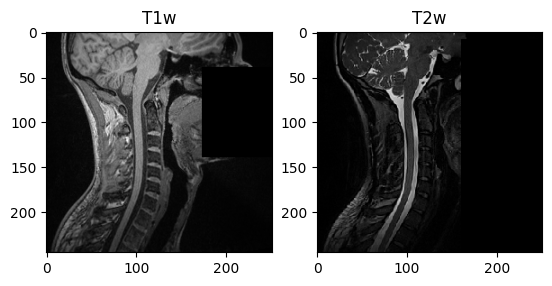

In [32]:
slice_T2w = img_T2w.data[25, :, :]
slice_T1w = img_T1w.data[25, :, :]

fig, (ax1, ax2) = plt.subplots(1,2)
ax1.imshow(slice_T1w, cmap='gray')
ax1.set_title('T1w')
ax2.imshow(slice_T2w, cmap='gray')
ax2.set_title('T2w')

In [33]:
def normalize(arr):
    '''
    Normalize image
    '''
    ma = arr.max()
    mi = arr.min()
    return ((arr - mi) / (ma - mi))

def scharr(img):
    return np.abs(cv2.Scharr(img, ddepth=cv2.CV_64F, dx=1, dy=0)) + np.abs(cv2.Scharr(img, ddepth=cv2.CV_64F, dx=0, dy=1))
    

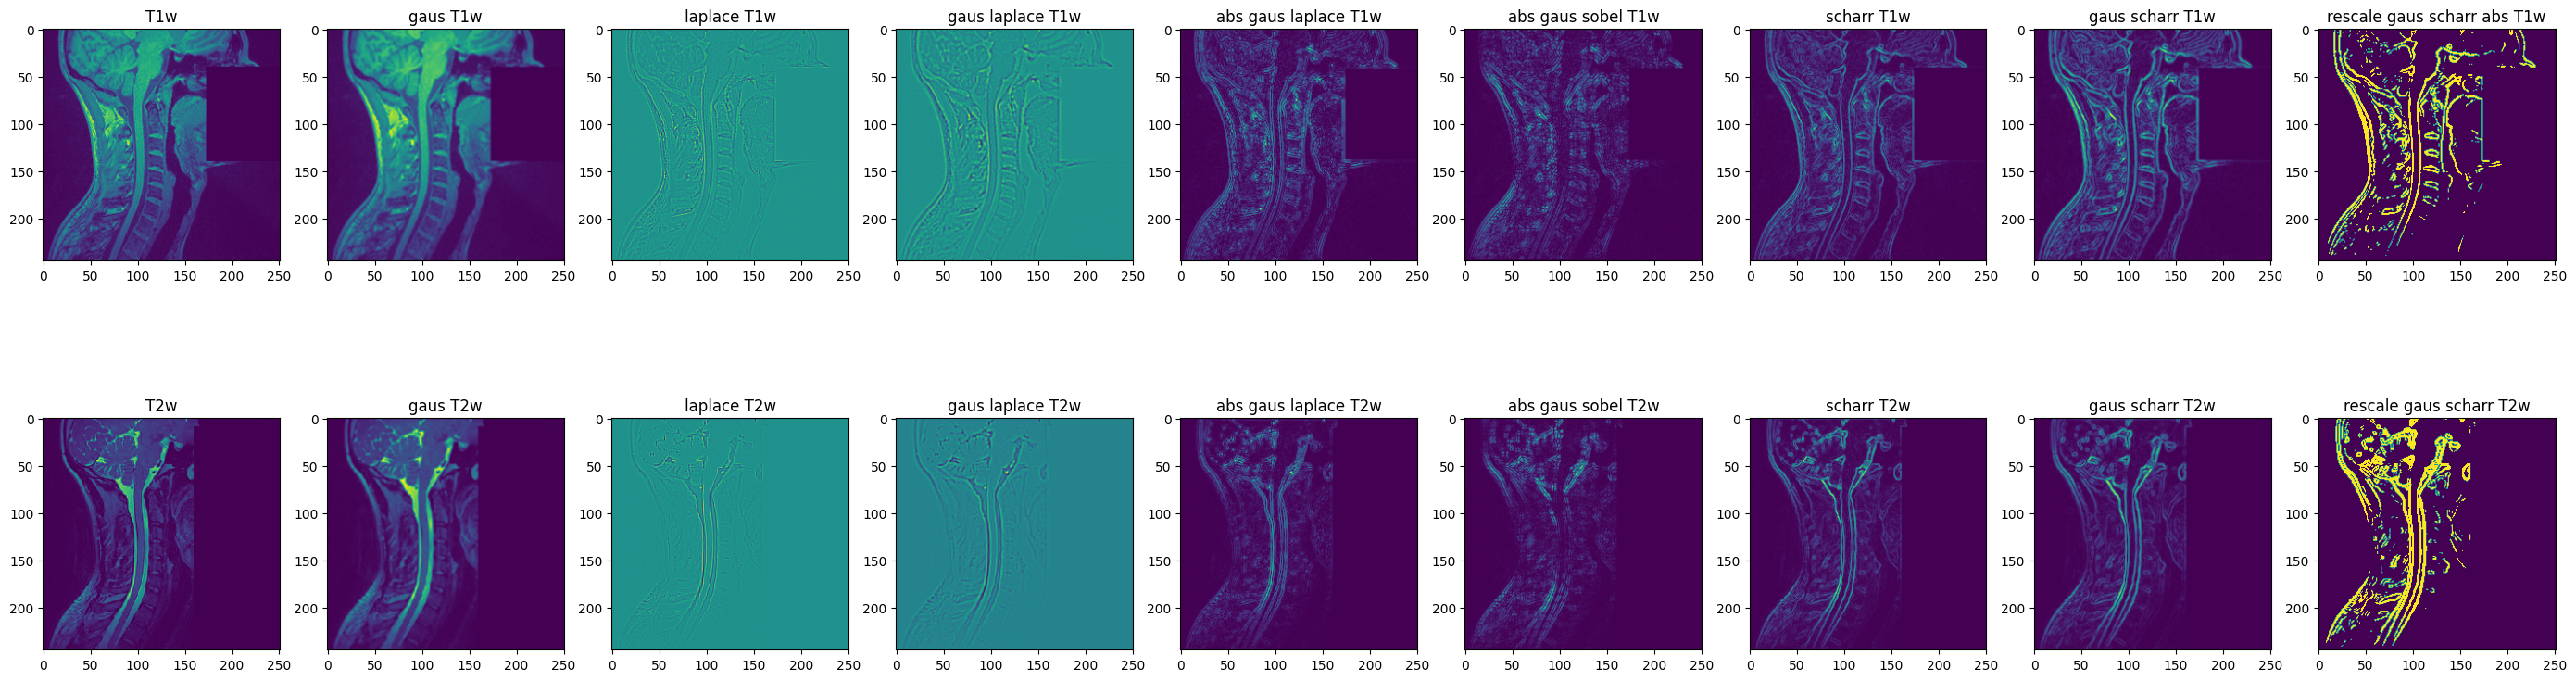

In [34]:
gaus_T2w = cv2.GaussianBlur(slice_T2w, (3, 3), 0)
laplace_T2w = cv2.Laplacian(slice_T2w, ddepth=cv2.CV_64F, ksize=3)
gaus_laplace_T2w = cv2.Laplacian(gaus_T2w, ddepth=cv2.CV_64F, ksize=3)
gaus_sobel_T2w = cv2.Sobel(gaus_T2w, ddepth=cv2.CV_64F, ksize=3, dx=1, dy=1)
#gaus_sobel_T2w = sobel(gaus_T2w)
scharr_T2w = np.abs(scharr(slice_T2w))
gaus_scharr_T2w = np.abs(scharr(gaus_T2w))
norm_gaus_scharr_T2w = normalize(np.abs(scharr(gaus_T2w)))
rescale_gaus_scharr_T2w = np.where(gaus_scharr_T2w>np.median(gaus_scharr_T2w)*20, 1, 0)
#gaus_scharr_T2w = scharr(gaus_T2w)

gaus_T1w = cv2.GaussianBlur(slice_T1w, (3, 3), 0)
laplace_T1w = cv2.Laplacian(slice_T1w, ddepth=cv2.CV_64F, ksize=3)
gaus_laplace_T1w = cv2.Laplacian(gaus_T1w, ddepth=cv2.CV_64F, ksize=3)
gaus_sobel_T1w = cv2.Sobel(gaus_T1w, ddepth=cv2.CV_64F, ksize=3, dx=1, dy=1)
#gaus_sobel_T1w = sobel(gaus_T1w)
scharr_T1w = np.abs(scharr(slice_T1w))
gaus_scharr_T1w = np.abs(scharr(gaus_T1w))
norm_gaus_scharr_T1w = normalize(np.abs(scharr(gaus_T1w)))
rescale_gaus_scharr_T1w = np.where(gaus_scharr_T1w>np.median(gaus_scharr_T1w)*8, 1, 0)
#gaus_scharr_T1w = scharr(gaus_T1w)

fig, axs = plt.subplots(2,9)
axs[0,0].imshow(slice_T1w)
axs[0,0].set_title('T1w')
axs[0,1].imshow(gaus_T1w)
axs[0,1].set_title('gaus T1w')
axs[0,2].imshow(laplace_T1w)
axs[0,2].set_title('laplace T1w')
axs[0,3].imshow(gaus_laplace_T1w)
axs[0,3].set_title('gaus laplace T1w')
axs[0,4].imshow(np.abs(gaus_laplace_T1w))
axs[0,4].set_title('abs gaus laplace T1w')
axs[0,5].imshow(np.abs(gaus_sobel_T1w))
axs[0,5].set_title('abs gaus sobel T1w')
axs[0,6].imshow(scharr_T1w)
axs[0,6].set_title('scharr T1w')
axs[0,7].imshow(gaus_scharr_T1w)
axs[0,7].set_title('gaus scharr T1w')
axs[0,8].imshow(rescale_gaus_scharr_T1w)
axs[0,8].set_title('rescale gaus scharr abs T1w')

axs[1,0].imshow(slice_T2w)
axs[1,0].set_title('T2w')
axs[1,1].imshow(gaus_T2w)
axs[1,1].set_title('gaus T2w')
axs[1,2].imshow(laplace_T2w)
axs[1,2].set_title('laplace T2w')
axs[1,3].imshow(gaus_laplace_T2w)
axs[1,3].set_title('gaus laplace T2w')
axs[1,4].imshow(np.abs(gaus_laplace_T2w))
axs[1,4].set_title('abs gaus laplace T2w')
axs[1,5].imshow(np.abs(gaus_sobel_T2w))
axs[1,5].set_title('abs gaus sobel T2w')
axs[1,6].imshow(scharr_T2w)
axs[1,6].set_title('scharr T2w')
axs[1,7].imshow(gaus_scharr_T2w)
axs[1,7].set_title('gaus scharr T2w')
axs[1,8].imshow(rescale_gaus_scharr_T2w)
axs[1,8].set_title('rescale gaus scharr T2w')

fig.set_figheight(10)
fig.set_figwidth(35)


In [35]:
# 2D scharr kernel
scharr_func_2D = np.array([[3, 10, 3]])
scharr_der_2D = np.array([[-1, 0, 1]])
mat_derx_xy = np.dot(np.transpose(scharr_func_2D), scharr_der_2D)
mat_dery_xy = np.dot(np.transpose(scharr_der_2D), scharr_func_2D)
print(np.transpose(scharr_func_2D).shape)
print(scharr_der_2D.shape)
#print('==== 2D ====')
#print('Gx =\n', mat_derx_xy)
#print('Gy =\n', mat_dery_xy)

# 3D scharr kernel
mat_derx_xyz = np.array([mat_derx_xy*scharr_func_2D[0,0], mat_derx_xy*scharr_func_2D[0,1], mat_derx_xy*scharr_func_2D[0,2]])
mat_dery_xyz = np.array([mat_dery_xy*scharr_func_2D[0,0], mat_dery_xy*scharr_func_2D[0,1], mat_dery_xy*scharr_func_2D[0,2]])
mat_derx_xyz = np.array([mat_derx_xy*scharr_func_2D[0,0], mat_derx_xy*scharr_func_2D[0,1], mat_derx_xy*scharr_func_2D[0,2]])
print('Gx =\n', repr(mat_derx_xyz))
print('Gy =\n', repr(mat_dery_xyz))


(3, 1)
(1, 3)
Gx =
 array([[[  -9,    0,    9],
        [ -30,    0,   30],
        [  -9,    0,    9]],

       [[ -30,    0,   30],
        [-100,    0,  100],
        [ -30,    0,   30]],

       [[  -9,    0,    9],
        [ -30,    0,   30],
        [  -9,    0,    9]]])
Gy =
 array([[[  -9,  -30,   -9],
        [   0,    0,    0],
        [   9,   30,    9]],

       [[ -30, -100,  -30],
        [   0,    0,    0],
        [  30,  100,   30]],

       [[  -9,  -30,   -9],
        [   0,    0,    0],
        [   9,   30,    9]]])


Text(0.5, 1.0, 'gaus scharr T2w')

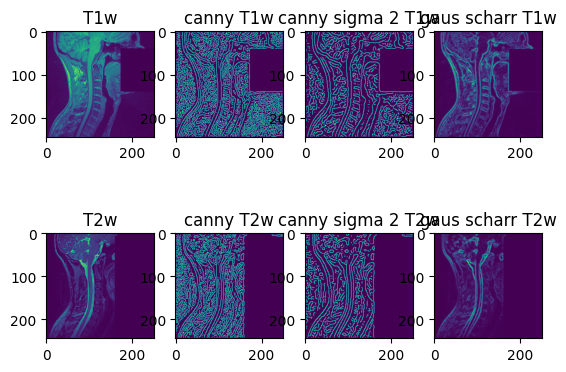

In [36]:
from skimage import feature

# T1w
edges1_T1w = feature.canny(gaus_T1w)
edges2_T1w = feature.canny(gaus_T1w, sigma=2)

# T2w
edges1_T2w = feature.canny(gaus_T2w)
edges2_T2w = feature.canny(gaus_T2w, sigma=2)

fig, axs = plt.subplots(2,4)
axs[0,0].imshow(slice_T1w)
axs[0,0].set_title('T1w')
axs[0,1].imshow(edges1_T1w)
axs[0,1].set_title('canny T1w')
axs[0,2].imshow(edges2_T1w)
axs[0,2].set_title('canny sigma 2 T1w')
axs[0,3].imshow(gaus_scharr_T1w)
axs[0,3].set_title('gaus scharr T1w')

axs[1,0].imshow(slice_T2w)
axs[1,0].set_title('T2w')
axs[1,1].imshow(edges1_T2w)
axs[1,1].set_title('canny T2w')
axs[1,2].imshow(edges2_T2w)
axs[1,2].set_title('canny sigma 2 T2w')
axs[1,3].imshow(gaus_scharr_T2w)
axs[1,3].set_title('gaus scharr T2w')

In [44]:
path_test_t2 = '/home/GRAMES.POLYMTL.CA/p118739/data_nvme_p118739/data/datasets/canproco/sub-tor070/ses-M12/anat/sub-tor070_ses-M12_T2w.nii.gz'

img = Image(path_test_t2).change_orientation('RSP')
print(img.dim)

test_t2 = normalize(img.data[32,:,:])

(64, 320, 320, 1, 0.79999924, 0.8000001, 0.8, 1)


<class 'numpy.ndarray'>


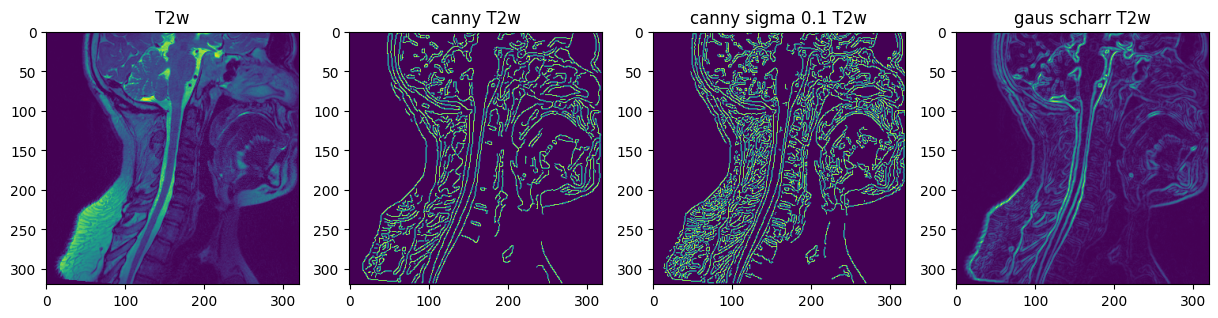

In [49]:
gaus_T2w = cv2.GaussianBlur(test_t2, (3, 3), 0)
gaus_scharr_T2w = np.abs(scharr(gaus_T2w))
norm_gaus_scharr_T2w = normalize(np.abs(scharr(gaus_T2w)))

# Canny
edges1_T2w = feature.canny(gaus_T2w)
edges2_T2w = feature.canny(gaus_T2w, sigma=0.1)

print(type(edges1_T2w))

fig, axs = plt.subplots(1,4)
axs[0].imshow(test_t2)
axs[0].set_title('T2w')
axs[1].imshow(edges1_T2w)
axs[1].set_title('canny T2w')
axs[2].imshow(edges2_T2w)
axs[2].set_title('canny sigma 0.1 T2w')
axs[3].imshow(gaus_scharr_T2w)
axs[3].set_title('gaus scharr T2w')

fig.set_figheight(5)
fig.set_figwidth(15)